# Run the final state algorithm on a ROOT HSDATA file

First create an object of your final state class. You may configure it if you want to limit the number of particles in an event or set to just run on generated simulation data.
This notebook is equivalent to the RunFSRootXXX.C macro which will be in the code directory.
Again just change XXX for your class name.
The string arguements set which particles you would like to use their pre-determined PID for and which you would like to be inclusive (i.e. any number of thse particles).
**Example**, 
1. for tagged photon experiment I might want fs("Beam","Beam")
This means use predetermined photon ID (i.e. I know it came from the tagger) and I will analyse events with any number of tagger photons.
2. fs("e-","proton:pi+:pi-")  i.e. use predetemined electron PID and just determine hadron species based on charge and try all combinations in events with any number of proton,pi+,pi-, but with the number of electrons defined for the topology
3. fs("NONE","ALL") => do not use any PID info other than charge, analyse events with any number of particles (this can be limited by SetMaxParticles)

In [1]:
gROOT->ProcessLine(".x LoadPi2.C+"); //Load the classes

In file included from LoadFinalState_C_ACLiC_dict dictionary payload:10:
/scratch/dglazier/testg8/HASPECT6/hsfinalstate/LoadFinalState.C:11:6: error: redefinition of 'LoadFinalState'
void LoadFinalState(){
     ^
/scratch/dglazier/tesths/HASPECT6/hsfinalstate/LoadFinalState.C:11:6: note: previous definition is here
void LoadFinalState(){
     ^


%%%%%%%%%%%%%%%%%%%%%%%%%    THSParticle


Warning in <TInterpreter::TCling::RegisterModule>: Problems declaring payload for module LoadFinalState_C_ACLiC_dict.


%%%%%%%%%%%%%%%%%%%%%%%%%    EventInfo
%%%%%%%%%%%%%%%%%%%%%%%%%    RunInfo
%%%%%%%%%%%%%%%%%%%%%%%%%    THSWeights
%%%%%%%%%%%%%%%%%%%%%%%%%    DataManager
%%%%%%%%%%%%%%%%%%%%%%%%%    LundReader
&&&&&&&&&&&&&&&&&&&&&&&&&&&& HSKinematics
&&&&&&&&&&&&&&&&&&&&&&&&&&&& Cuts
&&&&&&&&&&&&&&&&&&&&&&&&&&&& Combitorial
&&&&&&&&&&&&&&&&&&&&&&&&&&&& ParticleIter
&&&&&&&&&&&&&&&&&&&&&&&&&&&& Topology
&&&&&&&&&&&&&&&&&&&&&&&&&&&& FinalState
&&&&&&&&&&&&&&&&&&&&&&&&&&&& FiledTree
&&&&&&&&&&&&&&&&&&&&&&&&&&&& TreeData
&&&&&&&&&&&&&&&&&&&&&&&&&&&& TopoActionManager
&&&&&&&&&&&&&&&&&&&&&&&&&&&& ParticleCuts
&&&&&&&&&&&&&&&&&&&&&&&&&&&& VarsParticle
&&&&&&&&&&&&&&&&&&&&&&&&&&&& TreePrepParticle
&&&&&&&&&&&&&&&&&&&&&&&&&&&& MVASignalID
&&&&&&&&&&&&&&&&&&&&&&&&&&&& ParticleCutsManager
&&&&&&&&&&&&&&&&&&&&&&&&&&&& TreePrepManager
&&&&&&&&&&&&&&&&&&&&&&&&&&&& MVASignalIDManager
&&&&&&&&&&&&&&&&&&&&&&&&&&&& CLAS/CLASTrigger
&&&&&&&&&&&&&&&&&&&&&&&&&&&& CLAS12/CLAS12Trigger
&&&&&&&&&&&&&&&&&&&&&&&&&&&& CLAS

In [2]:
 Pi2 fs("NONE",""); //string arguments => PID, INCLUSIVE
  // fs.SetGenerated(); //just analyse generated branch
  // fs.SetMaxParticles(10); //max number of particles of any 1 type
 

 WARNING running HS::FinalState::AutoIter() you  should check the topology print output and make sure the displayed iterator is waht you want ..
 WARNING running HS::FinalState::AutoIter() you  should check the topology print output and make sure the displayed iterator is waht you want ..
 WARNING running HS::FinalState::AutoIter() you  should check the topology print output and make sure the displayed iterator is waht you want ..
 WARNING running HS::FinalState::AutoIter() you  should check the topology print output and make sure the displayed iterator is waht you want ..
 Topology::Print() : 0
    particles = -10000 -10000 10000 10000 
The following particle are identified by pdg code : 
 ALL 
 ParticleIter::Print() 
     Type : 2 number chosen 1 of id  11 and number used here = 1
 ParticleIter::Print() 
     Type : 2 number chosen 1 of id  2212 and number used here = 1
 ParticleIter::Print() 
     Type : 2 number chosen 1 of id  -211 and number used here = 1
 ParticleIter::Print() 


Create an output tree. Here we will use a FiledTree object which is a wrapper class to a tree in a file. We will also create this as a smart pointer so we can delete it at the end by calling reset(), this will save the tree to disk. The Filed tree needs 2 strings ,1 a treename and the other the file name. You should give the full path for where you would like the files saved. It will overwrite any existing files. 

In [3]:
  //strings = treename and filename (give full path)
  auto output = new FiledTree("FinalTree","/scratch/dglazier/clas12/Run4909.root");
  fs.FinalStateOutTree(output->Tree()); //connect ouput tree to final state branches

In [4]:
ParticleCutsManager cutsman;
auto eCut=make_shared<DeltaTimeCut>(2); //7ns delta time cut
auto otherCut=make_shared<DeltaTimeCut>(2); //10ns cut for all other particles
cutsman.AddParticleCut("e-",eCut); //assign to manager
cutsman.SetDefaultCut(otherCut); //assign to manager
cutsman.ConfigureCuts(&fs);   
fs.RegisterPostTopoAction(&cutsman);

Info ParticleCutsManager AddParticleCut set cut for 0
Info ParticleCutsManager AddParticleCut set cut for 11


Now we configure the input data. Here we use a ROOT file presaved in HSDATA format. It is possible to analyse other dataformats via the DataManager class.

In [5]:
 //create datamanager
  auto dm=std::make_shared<DataManager>();

  //And make a chain of data files
  TChain chain("HSParticles");
  chain.Add("/w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.*");
  dm->InitChain(&chain);

  //connect FinalState to Data by moving the pointer
  fs.SetDataManager(dm);

Info in <DataManager::InitChain>:  Will proceess all 392 files in chain


DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8


Analyse all the events. Not you may prefer just looping over the data manager directly via while(dm->ReadEvent()) fs->Process();
You can also supply a number of events to analyse e.g. fs.ProcessData(100);

In [6]:
cout<<"Number of Events to process "<<chain.GetEntries()<<endl;
fs.ProcessData(); //No number give, analyse all events in chain

Number of Events to process 20720600
51526 1 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00061.hipo.root 1 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 100000
51262 2 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00062.hipo.root 2 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51475 3 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00063.hipo.root 3 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 200000
51668 4 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00064.hipo.root 4 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51542 5 392
DataManager::Ne

53550 36 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00136.hipo.root 36 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 2000000
52325 37 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00137.hipo.root 37 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
52231 38 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00138.hipo.root 38 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 2100000
52075 39 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00139.hipo.root 39 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51661 40 392
DataManager::NextChainFile() new file : /

51410 71 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00171.hipo.root 71 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 3800000
51751 72 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00172.hipo.root 72 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51732 73 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00173.hipo.root 73 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 3900000
51661 74 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00174.hipo.root 74 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51792 75 392
DataManager::NextChainFile() new file : /

 ProcessData event 5700000
60916 106 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00206.hipo.root 106 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
56348 107 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00207.hipo.root 107 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 5800000
53739 108 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00208.hipo.root 108 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
53000 109 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00209.hipo.root 109 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 5900000
52422 110 392
DataM

 ProcessData event 7500000
51387 141 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00241.hipo.root 141 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51491 142 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00242.hipo.root 142 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 7600000
51488 143 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00243.hipo.root 143 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51696 144 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00244.hipo.root 144 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 7700000
51585 145 392
DataM

 ProcessData event 9300000
51488 176 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00276.hipo.root 176 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51520 177 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00277.hipo.root 177 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 9400000
51550 178 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00278.hipo.root 178 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 9500000
51632 179 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00279.hipo.root 179 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51388 180 392
DataM

51445 211 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00391.hipo.root 211 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 11200000
51457 212 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00392.hipo.root 212 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51565 213 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00393.hipo.root 213 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 11300000
51464 214 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00394.hipo.root 214 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51461 215 392
DataManager::NextChainFile() n

81395 246 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00426.hipo.root 246 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 13000000
74826 247 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00427.hipo.root 247 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 13100000
61979 248 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00428.hipo.root 248 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
56260 249 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00429.hipo.root 249 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 13200000
53957 250 392
Da

 ProcessData event 14800000
51769 281 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00461.hipo.root 281 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 14900000
51745 282 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00462.hipo.root 282 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51790 283 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00463.hipo.root 283 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 15000000
51741 284 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00464.hipo.root 284 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51538 285 392
Da

 ProcessData event 16700000
57501 316 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00496.hipo.root 316 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
54961 317 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00497.hipo.root 317 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 16800000
53153 318 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00498.hipo.root 318 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
52706 319 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00499.hipo.root 319 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 16900000
52224 320 392
Da

 ProcessData event 18500000
51142 351 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00531.hipo.root 351 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51272 352 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00532.hipo.root 352 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 18600000
51368 353 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00533.hipo.root 353 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51502 354 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00534.hipo.root 354 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 18700000
51819 355 392
Da

 ProcessData event 20400000
52304 386 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00566.hipo.root 386 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51616 387 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00567.hipo.root 387 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 20500000
51581 388 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00568.hipo.root 388 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
51299 389 392
DataManager::NextChainFile() new file : /w/work1/jlab/hallb/clas12/RG-A/hs/fall18/cooked/run4909/out_clas_pin_004909.evio.00569.hipo.root 389 392
DataManager::InitReader set branch 0x7f13b044a4f8 0x7f13b044a4f8
 ProcessData event 20600000
51232 390 392
Da

Draw some variables from your tree.

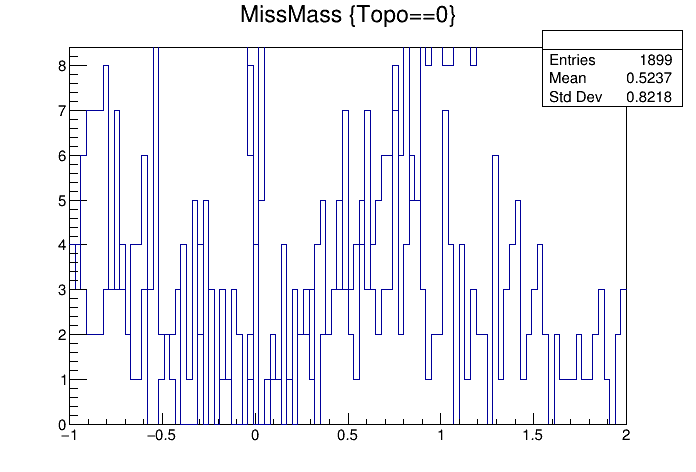

In [7]:
TCanvas c1;
output->Tree()->Draw("MissMass>>(100,-1,2)","Topo==0");
output->Tree()->Draw("MissMass","Topo==1","same");
output->Tree()->Draw("MissMass","Topo==2","same");
output->Tree()->Draw("MissMass","Topo==3","same");
c1.Draw();

And remember to save the tree!

In [8]:
delete output;